# ''Supermarket Customers Analysis''

# Latar Belakang dan Masalah

## Latar Belakang:
Perusahaan XYZ, yang bergerak di sektor ritel atau supermarket, dihadapkan pada tuntutan untuk memahami lebih dalam perilaku dan preferensi pelanggan. Dalam rangka meningkatkan strategi pemasaran, manajemen perusahaan perlu menggali wawasan dari data pelanggan yang dimilikinya. Data tersebut mencakup informasi demografis pelanggan, detail pembelian produk, respons terhadap kampanye pemasaran, dan keluhan pelanggan.

Dalam dunia ritel yang kompetitif, pemahaman mendalam terhadap pelanggan merupakan kunci untuk memberikan layanan yang lebih baik, meningkatkan penjualan, dan merumuskan strategi pemasaran yang lebih efektif. Dengan menganalisis data yang telah dikumpulkan, perusahaan dapat mengidentifikasi pola-pola tertentu, memahami kebutuhan pelanggan, dan mengambil langkah-langkah yang lebih tepat guna.

## Rumusan Masalah:
Beberapa pertanyaan mendasar yang akan coba dipecahkan dalam project ini antara lain:
1. Bagaimana segmentasi pelanggan?
2. Bagaimana performa penjualan?
3. Bagaimana efektifitas campaign?
4. Bagaimana efektifitas website?
5. Bagaimana dengan komplain pelanggan?

Dengan merumuskan pertanyaan-pertanyaan ini, analisis data dapat memberikan pandangan yang holistik dan rekomendasi yang bermanfaat bagi perusahaan untuk meningkatkan layanan, merancang strategi pemasaran yang lebih efektif, dan menjaga kepuasan pelanggan.

# Data Cleaning and Understanding 

## Import & Understanding Data

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

#Reading datasets
df = pd.read_csv('C:/Users/giova/Documents/purwadhika/Supermarket Customers.csv', sep='\t')

In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Keterangan Kolom:**
1. ID: Identifikasi unik pelanggan.
2. Year_Birth: Tahun kelahiran pelanggan.
3. Education: Tingkat pendidikan pelanggan.
4. Marital_Status: Status pernikahan pelanggan.
5. Income: Pendapatan tahunan rumah tangga pelanggan.
6. Kidhome: Jumlah anak-anak dalam rumah tangga pelanggan.
7. Teenhome: Jumlah remaja dalam rumah tangga pelanggan.
8. Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan.
9. Recency: Jumlah hari sejak pembelian terakhir oleh pelanggan.
10. Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 sebaliknya.
11. MntWines: Jumlah uang yang dihabiskan untuk pembelian wine dalam 2 tahun terakhir.
12. MntFruits: Jumlah uang yang dihabiskan untuk pembelian buah-buahan dalam 2 tahun terakhir.
13. MntMeatProducts: Jumlah uang yang dihabiskan untuk pembelian produk meat dalam 2 tahun terakhir.
14. MntFishProducts: Jumlah uang yang dihabiskan untuk pembelian produk ikan dalam 2 tahun terakhir.
15. MntSweetProducts: Jumlah uang yang dihabiskan untuk pembelian produk kue-manis dalam 2 tahun terakhir.
16. MntGoldProds: Jumlah uang yang dihabiskan untuk pembelian produk gold dalam 2 tahun terakhir.
17. NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon.
18. AcceptedCmp1 - AcceptedCmp5: 1 jika pelanggan menerima tawaran dalam kampanye ke-1 hingga ke-5, 0 sebaliknya.
19. Response: 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 sebaliknya.
20. NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan.
21. NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog.
22. NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko-toko perusahaan.
23. NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir.

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#merubah tipe data menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [6]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


## Data Cleaning

**Drop Kolom**

Setelah diperhatikan terdapat kolom yang tidak ada di dictionary dan semuanya bernilai sama, kita akan drop kolom 'Z_CostContact' dan 'Z_Revenue'

In [7]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

**Mencari Duplikat**

In [8]:
#Mencari duplikat
duplikat = df[df.duplicated()]
duplikat

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


Setelah diperhatikan, tidak ada data yang duplikat.

**Mencari Data yang Kosong**

In [9]:
#Mencari data yang kosong
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Terdapat data yang kosong pada kolom 'Income', kita akan coba evaluasi apakah data tersebut pantas untuk dipertahankan

In [10]:
#menemukan Data dengan terdapat nilai kosong
def nullrow(x): 
    return x[x.isnull().any(axis=1)]
nullrow(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,1,7,6,0,0,0,0,0,0,0


Setelah melihat data yang mengandung NaN, data ini masih layak digunakan, sehingga diputuskan akan dilakukan imputation dengan mean berdasarkan rata-rata income dengan status edukasi yang sama (ini berdasarkan asumsi bahwa status pendidikan yang sama biasanya memiliki income yang tidak jauh berbeda). Akan tetapi terlebih dahulu akan dicek nilai unik apa saja yang ada pada kolom 'Education'

**Mencari Nilai Unik dari Kolom Education**

In [11]:
#Mencari Nilai Unik dari Kolom Education
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

**KETERANGAN**
1. *Graduation*: Ini merujuk pada tingkat pendidikan sarjana atau gelar kesarjanaan. Seseorang yang telah menyelesaikan program sarjana akan memiliki status pendidikan ini.

2. *PhD (Doctor of Philosophy)*: Ini adalah tingkat pendidikan tertinggi yang dapat ditempuh di banyak negara. Gelar PhD umumnya diberikan setelah menyelesaikan penelitian tingkat tinggi dan menulis disertasi.

3. *Master*: Ini merujuk pada tingkat pendidikan magister atau gelar master. Seseorang yang telah menyelesaikan program master akan memiliki status pendidikan ini.

4. *Basic*: Status pendidikan ini mungkin merujuk pada tingkat pendidikan dasar atau umumnya diberikan kepada seseorang yang belum menyelesaikan pendidikan tinggi.

5. *2n Cycle*: Mungkin merujuk pada tingkat pendidikan yang melibatkan program studi lanjutan setelah menyelesaikan gelar sarjana. Dalam beberapa sistem pendidikan Eropa, ini bisa mengacu pada gelar lanjutan setelah sarjana.


**Kesimpulan**: Tidak ada masalah dengan kolom 'Education' sehingga imputation dapat dilakukan

**Imputation**

In [12]:
# Mencari rata-rata pendapatan dengan edukasi yang sama
unique_means = df.groupby(['Education'])["Income"].transform('mean')
# Mengisi nilai yang kosong pada kolom 'Income' dengan rata-rata income yang memiliki status edukasi yang sama
df["Income"].fillna(unique_means, inplace=True)
df["Income"]=round(df['Income']).astype(int)

**Feature Engineering: 'Age'**

Pada langkah selanjutnya akan dibuat fitur kolom baru yang merupakan kolom 'Age' yaitu umur seseorang menjadi costumer untuk pertama kalinya, karena diasumsikan lebih informatif dibanding kolom 'Year_Birth'

In [13]:
#Cek kolom Dt_Customer
df['Dt_Customer'].describe()

C:\Users\giova\AppData\Local\Temp/ipykernel_13864/1631029129.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Dt_Customer'].describe()


count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [14]:
#Feature Enginering (membuat kolom baru Age)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age']=(df['Dt_Customer'].dt.year- df['Year_Birth'])

In [15]:
#Cek kolom Age
df['Age'].describe()

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

Perhatikan bahwa umur maksimal yang didapat diatas rata-rata umur hidup manusia, kemungkinan terdapat data outlier di beberapa feature ('Age', 'Recency', 'Income'), maka kita akan coba melihat sebaran outlier dan menghilangkannya

**Cek Outlier**

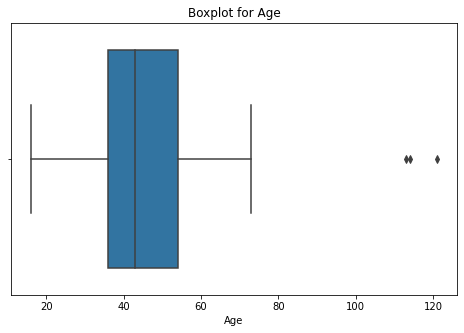

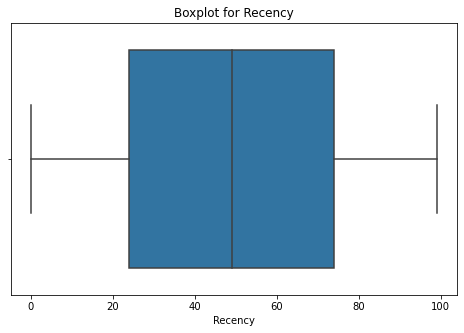

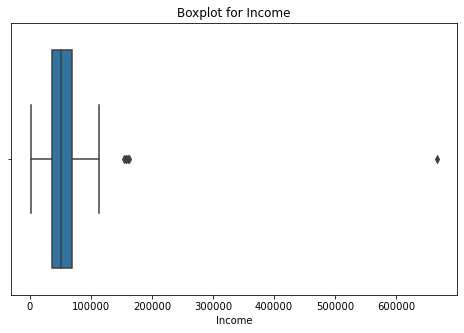

In [16]:
# Cek Outlier
for i, feature in enumerate(['Age', 'Recency', 'Income']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

Dari boxplot, diketahui hanya 'Age' dan 'Income' yang perlu diremove outliernya

**Remove Outlier**

In [17]:
# Hapus Outlier
for feature in ['Age', 'Income']:
    # Hitung IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas atas dan bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus outlier
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


**Feature Engineering: 'Age_Labels'**

Selanjutnya akan dikelompokan customer berdasarkan umur dengan menggunakan refernsi ini:
https://gaya.tempo.co/read/1724197/kategori-umur-balita-remaja-dan-dewasa-menurut-kemenkes-jangan-salah

In [18]:
# Rentang usia untuk remaja, dewasa, pra lanjut usia, dan lanjut usia
age_boundaries = [0, 11, 19, 44, 59, float('inf')]  

# Tentukan label kategori usia
age_labels = ['Child','Teenagers', 'Adult', 'Pre-Senior', 'Senior']

#melakukan pengelompokan berdasarkan umur
df['Age_Labels'] = pd.cut(df['Age'], bins=age_boundaries, labels=age_labels, right=False)

In [19]:
#Melihat kategori umur apa saja yang ada pada data 'Age_Labels'
df['Age_Labels'].unique()

['Pre-Senior', 'Senior', 'Adult', 'Teenagers']
Categories (5, object): ['Child' < 'Teenagers' < 'Adult' < 'Pre-Senior' < 'Senior']

**Mencari Nilai Unik dari Kolom 'Marital_Status'** 

Selanjutnya kita akan mengecek kolom 'Marital_Status'

In [20]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

**Mengganti Data 'Marital_Status' yang Tidak Relevan**

Di Indonesia tidak mengenal status "Alone", "Absurd", "Together" dan "YOLO" yang diasumsikan sama seperti "Single", kita akan merapikan data tersebut menjadi status "Single"

In [21]:
#mengganti status "Alone", "Absurd", "Together" dan "YOLO" menjadi "Single"
def replace_status(status):
    # Daftar kata yang akan diganti
    change = ["Alone", "Absurd", "Together", "YOLO"]

    # Mengganti setiap kata dalam kolom dengan "Single"
    status.loc[status.isin(change)] = "Single"

replace_status(df['Marital_Status'])

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**Feature Engineering: 'Child_Status'**

Perhatikan bahwa terdapat kolom Kidhome dan Teenhome yang menunjukan bahwa customer memiliki anak / tidak, jadi kita akan buat kolom 'Child_Status' yang menunjukan apakah memiliki anak / tidak

In [22]:
#Membuat kolom baru yang menginformasikan apakah pelanggan memiliki anak / tidak
df['Child_Status'] = np.where(df['Kidhome']+df['Teenhome'] == 0, 'Not Have Child', 'Have Child')

**Feature Engineering: 'Active_Cust'**

Pada kolom ini pelanggan dikatakan aktif jika terakhir kali maksimal 60 hari melakukan pembelian, selebihnya dikatakan pasif

In [23]:
df['Active_Cust'] = np.where(df['Recency']<= 60, 'Active', 'Passive')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Labels,Child_Status,Active_Cust
0,5524,1957,Graduation,Single,58138,0,0,2012-04-09,58,635,...,0,0,0,0,0,1,55,Pre-Senior,Not Have Child,Active
1,2174,1954,Graduation,Single,46344,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,60,Senior,Have Child,Active
2,4141,1965,Graduation,Single,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,48,Pre-Senior,Not Have Child,Active
3,6182,1984,Graduation,Single,26646,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,30,Adult,Have Child,Active
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,33,Adult,Have Child,Passive


**Drop Kolom**

Perhatikan bahwa kolom kolom seperti Kidhome, Teenhome, Year_Birth, Dt_Customer sudah dibuat menjadi feature baru, sehingga kita bisa drop semua kolom tersebut

In [24]:
df = df.drop(['Kidhome', 'Teenhome', 'Year_Birth', 'Dt_Customer'], axis=1)

## Cek And Save Clean Data

**Cek Clean Data**

In [25]:
df.head(10)

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Labels,Child_Status,Active_Cust
0,5524,Graduation,Single,58138,58,635,88,546,172,88,...,0,0,0,0,0,1,55,Pre-Senior,Not Have Child,Active
1,2174,Graduation,Single,46344,38,11,1,6,2,1,...,0,0,0,0,0,0,60,Senior,Have Child,Active
2,4141,Graduation,Single,71613,26,426,49,127,111,21,...,0,0,0,0,0,0,48,Pre-Senior,Not Have Child,Active
3,6182,Graduation,Single,26646,26,11,4,20,10,3,...,0,0,0,0,0,0,30,Adult,Have Child,Active
4,5324,PhD,Married,58293,94,173,43,118,46,27,...,0,0,0,0,0,0,33,Adult,Have Child,Passive
5,7446,Master,Single,62513,16,520,42,98,0,42,...,0,0,0,0,0,0,46,Pre-Senior,Have Child,Active
6,965,Graduation,Divorced,55635,34,235,65,164,50,49,...,0,0,0,0,0,0,41,Adult,Have Child,Active
7,6177,PhD,Married,33454,32,76,10,56,3,1,...,0,0,0,0,0,0,28,Adult,Have Child,Active
8,4855,PhD,Single,30351,19,14,0,24,3,3,...,0,0,0,0,0,1,39,Adult,Have Child,Active
9,5899,PhD,Single,5648,68,28,0,6,1,1,...,0,0,0,0,0,0,64,Senior,Have Child,Passive


**Save Clean Data**

In [26]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('~\Documents\purwadhika\CleanData_SupermarketCustomers.csv', index=False)

# Menyimpan DataFrame ke dalam file excel
df.to_excel('~\Documents\purwadhika\CleanData_SupermarketCustomers.xlsx', index=False)

# Data Analysis

## Segmentasi Pelanggan

**1. Berapakah jumlah total pelanggan yang tercatat?**

In [27]:
# Menghitung total jumlah pelanggan
total = df.shape[0]
total

2229

Jadi, total pelanggan yang tercatat adalah sebanyak 2229

==========================================

**2. Bagaimanakah jumlah dan persentase pelanggan setiap kelompok? (Misalnya, kelompok umur, status pernikahan, dll.)**

In [28]:
Total_byAge = df['Age_Labels'].value_counts()
Perc_byAge = (Total_byAge / len(df)) * 100

print("Jumlah Pelanggan dalam Kelompok Umur:")
print(Total_byAge)
print("\nPersentase Pelanggan dalam Kelompok Umur:")
print(Perc_byAge)

Jumlah Pelanggan dalam Kelompok Umur:
Adult         1147
Pre-Senior     762
Senior         314
Teenagers        6
Child            0
Name: Age_Labels, dtype: int64

Persentase Pelanggan dalam Kelompok Umur:
Adult         51.458053
Pre-Senior    34.185734
Senior        14.087035
Teenagers      0.269179
Child          0.000000
Name: Age_Labels, dtype: float64


In [29]:
Total_byMarr = df['Marital_Status'].value_counts()
Perc_byMarr = (Total_byMarr / len(df)) * 100

print("Jumlah Pelanggan dalam Kelompok Status Pernikahan:")
print(Total_byMarr)
print("\nPersentase Pelanggan dalam Kelompok Status Pernikahan:")
print(Perc_byMarr)

Jumlah Pelanggan dalam Kelompok Status Pernikahan:
Single      1061
Married      861
Divorced     230
Widow         77
Name: Marital_Status, dtype: int64

Persentase Pelanggan dalam Kelompok Status Pernikahan:
Single      47.599821
Married     38.627187
Divorced    10.318528
Widow        3.454464
Name: Marital_Status, dtype: float64


In [30]:
Total_byEdu = df['Education'].value_counts()
Perc_byEdu = (Total_byEdu / len(df)) * 100

print("Jumlah Pelanggan dalam Kelompok Pendidikan:")
print(Total_byEdu)
print("\nPersentase Pelanggan dalam Kelompok Pendidikan:")
print(Perc_byEdu)

Jumlah Pelanggan dalam Kelompok Pendidikan:
Graduation    1124
PhD            481
Master         369
2n Cycle       201
Basic           54
Name: Education, dtype: int64

Persentase Pelanggan dalam Kelompok Pendidikan:
Graduation    50.426200
PhD           21.579183
Master        16.554509
2n Cycle       9.017497
Basic          2.422611
Name: Education, dtype: float64


In [31]:
Total_byChild = df['Child_Status'].value_counts()
Perc_byChild = (Total_byChild / len(df)) * 100

print("Jumlah Pelanggan dalam Kelompok Status Memiliki Anak:")
print(Total_byChild)
print("\nPersentase Pelanggan dalam Kelompok Status Memiliki Anak:")
print(Perc_byChild)

Jumlah Pelanggan dalam Kelompok Status Memiliki Anak:
Have Child        1596
Not Have Child     633
Name: Child_Status, dtype: int64

Persentase Pelanggan dalam Kelompok Status Memiliki Anak:
Have Child        71.601615
Not Have Child    28.398385
Name: Child_Status, dtype: float64


Jadi, berdasarkan profil yang ada, pelanggan dengan status adult, single, graduation, dan memiliki anak adalah yang tertinggi dalam catatan jumlah dan persentase pelanggan masing masing kelompok. Akan tetapi, pelanggan dengan status child dan teenagers, widow, basic, dan tidak memiliki anak adalah yang terendah dalam catatan jumlah dan persentase pelanggan masing masing kelompok

==========================================

**3. Apakah distribusi umur pelanggan berdistribusi normal?**

C:\Users\giova\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

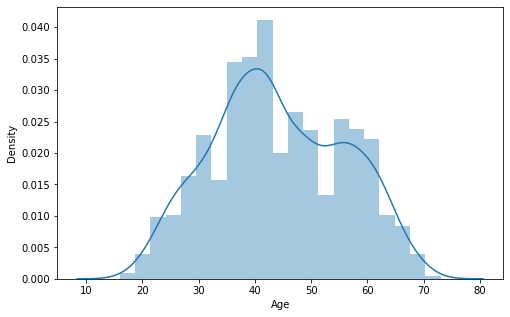

In [32]:
#melihat distribusi data umur
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])

Secara plot bisa dikatakan distribusi data umur normal, akan tetapi kita akan menguji dengan Kolmogorov-Smirnov

In [33]:
#Melakukan uji normalitas dengan Kolmogorov-Smirnov
from scipy.stats import kstest
stat, p_value = kstest(df['Age'], 'norm')

#Kesimpulan
if p_value < 0.05:
    print("Data tidak terdistribusi normal.")
else:
    print("Data terdistribusi normal.")

Data tidak terdistribusi normal.


==========================================

## Performa Penjualan

**1. Berapakah jumlah dan persentase pelanggan yang tergolong aktif / pasif?**

In [34]:
pasif = df[df['Active_Cust'] == 'Passive']['Active_Cust'].count()
pasif

858

In [35]:
perc_pasif=pasif/total*100
perc_pasif

38.49259757738896

In [36]:
aktif = df[df['Active_Cust'] == 'Active']['Active_Cust'].count()
aktif

1371

In [37]:
perc_aktif=100-perc_pasif
perc_aktif

61.50740242261104

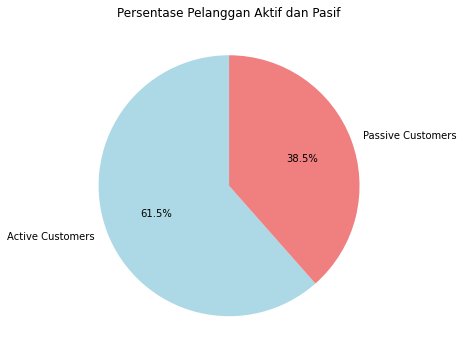

In [38]:
# Menampilkan diagram pie chart
labels = ['Active Customers', 'Passive Customers']
sizes = [perc_aktif, perc_pasif]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Pelanggan Aktif dan Pasif')
plt.show()

Perhatikan bahwa terdapat 861 orang pelanggan dengan persentase 38,5% dari total pelanggan yang tergolong pasif dalam membeli (lebih dari 2 bulan dari terakhir melakukan pembelian)

==========================================

**2. Berapakah jumlah serta rata-rata penjualan 2 tahun terakhir dan total pelanggan di masing masing komoditas? Manakah yang tertinggi?**

In [39]:
#Jumlah penjualan tiap komoditas
print('Jumlah Penjualan Wines:',df.MntWines.sum())
print('Jumlah Penjualan Fruits:',df.MntFruits.sum())
print('Jumlah Penjualan Meat:',df.MntMeatProducts.sum())
print('Jumlah Penjualan Fish:',df.MntFishProducts.sum())
print('Jumlah Penjualan Sweet:',df.MntSweetProducts.sum())
print('Jumlah Penjualan Gold:',df.MntGoldProds.sum())

Jumlah Penjualan Wines: 679826
Jumlah Penjualan Fruits: 58731
Jumlah Penjualan Meat: 368418
Jumlah Penjualan Fish: 83905
Jumlah Penjualan Sweet: 60543
Jumlah Penjualan Gold: 98328


In [40]:
#Rata-rata penjualan tiap komoditas
print('Rata-Rata Penjualan Wines:',df.MntWines.mean())
print('Rata-Rata Penjualan Fruits:',df.MntFruits.mean())
print('Rata-Rata Penjualan Meat:',df.MntMeatProducts.mean())
print('Rata-Rata Penjualan Fish:',df.MntFishProducts.mean())
print('Rata-Rata Penjualan Sweet:',df.MntSweetProducts.mean())
print('Rata-Rata Penjualan Gold:',df.MntGoldProds.mean())

Rata-Rata Penjualan Wines: 304.9914759982055
Rata-Rata Penjualan Fruits: 26.348586810228802
Rata-Rata Penjualan Meat: 165.28398384925976
Rata-Rata Penjualan Fish: 37.64244055630328
Rata-Rata Penjualan Sweet: 27.16150740242261
Rata-Rata Penjualan Gold: 44.11305518169583


In [41]:
# Menghitung total cust yang membeli setiap komoditas
cust_wines = df['MntWines'].apply(lambda x: 1 if x > 0 else 0).sum()
cust_fruits = df['MntFruits'].apply(lambda x: 1 if x > 0 else 0).sum()
cust_meat = df['MntMeatProducts'].apply(lambda x: 1 if x > 0 else 0).sum()
cust_fish = df['MntFishProducts'].apply(lambda x: 1 if x > 0 else 0).sum()
cust_sweets = df['MntSweetProducts'].apply(lambda x: 1 if x > 0 else 0).sum()
cust_gold = df['MntGoldProds'].apply(lambda x: 1 if x > 0 else 0).sum()

# Total cust
print("Total Pelanggan yang Membeli Wines:", cust_wines)
print("Total Pelanggan yang Membeli Fruits:", cust_fruits)
print("Total Pelanggan yang Membeli Meat Products:", cust_meat)
print("Total Pelanggan yang Membeli Fish Products:", cust_fish)
print("Total Pelanggan yang Membeli Sweets:", cust_sweets)
print("Total Pelanggan yang Membeli Gold Products:", cust_gold)

Total Pelanggan yang Membeli Wines: 2216
Total Pelanggan yang Membeli Fruits: 1831
Total Pelanggan yang Membeli Meat Products: 2228
Total Pelanggan yang Membeli Fish Products: 1845
Total Pelanggan yang Membeli Sweets: 1812
Total Pelanggan yang Membeli Gold Products: 2168


Perhatikan bahwa secara rata-rata penjualan tertinggi adalah pembelian wines di angka 305, meat di angka 165, dan gold di angka 44. 
Jumlah penjualan tertinggi adalah pembelian wines di angka 679826, meat di angka 368418, dan gold di angka 98328. 
Total pelanggan tertinggi yang melakukan pembelian adalah wines, meat, dan gold.

==========================================

**3. Apa preferensi pembelian produk untuk setiap kelompok pelanggan? (Misalnya, kelompok umur, status pernikahan, dll.)**

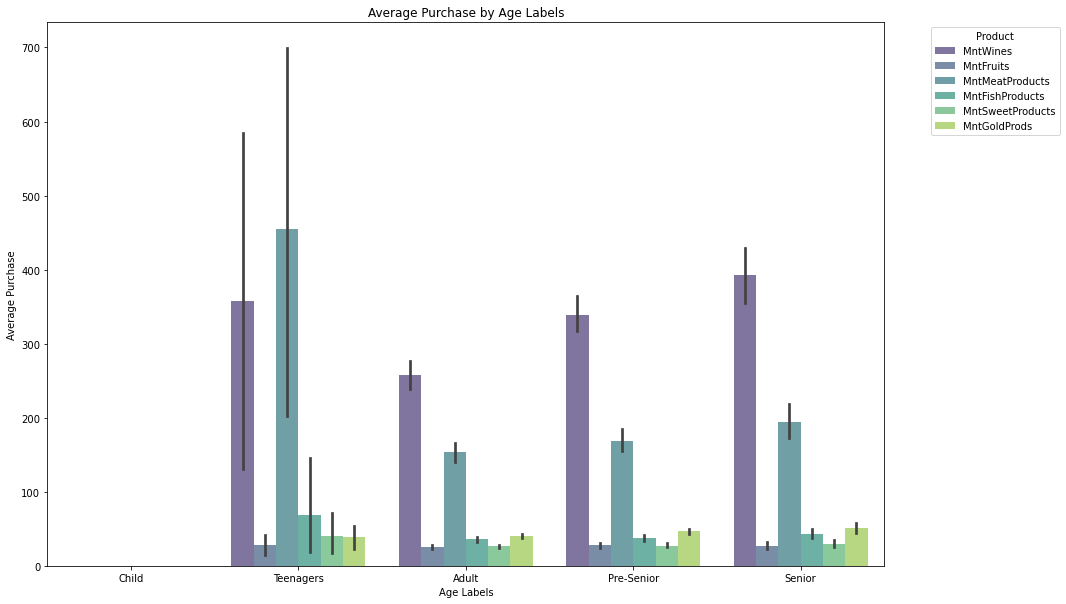

In [42]:
# List komoditas
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Melt DataFrame untuk mempermudah visualisasi
df_melted = pd.melt(df, id_vars=['Age_Labels'], value_vars=products, var_name='Product', value_name='Total_Purchase')

# Plotting rata-rata pembelian produk untuk setiap kelompok umur
plt.figure(figsize=(15, 10))
sns.barplot(x='Age_Labels', y='Total_Purchase', hue='Product', data=df_melted, palette='viridis', alpha=0.7)
plt.title('Average Purchase by Age Labels')
plt.xlabel('Age Labels')
plt.ylabel('Average Purchase')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Perhatikan bahwa Teenagers adalah customer yang memiliki rata-rata pembelian tertinggi dari hampir seluruh komoditas selain Wines dan Gold (Emas), akan tetapi perlu diingat bahwa jumlah teenagers hanya 6 orang dari keseluruhan pelanggan

==========================================

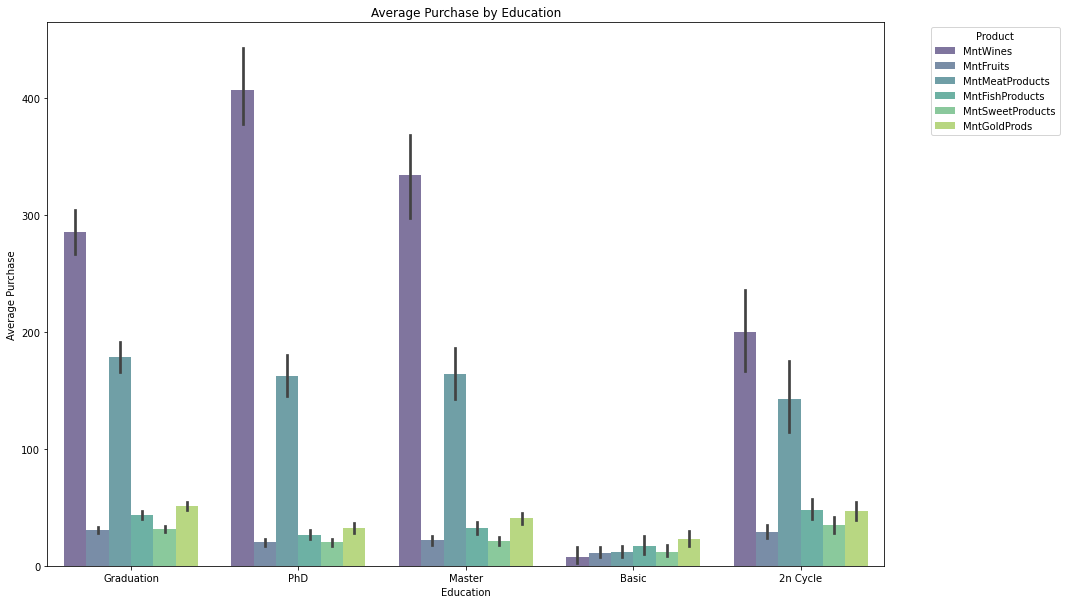

In [43]:
# Melt DataFrame untuk mempermudah visualisasi
df_melted = pd.melt(df, id_vars=['Education'], value_vars=products, var_name='Product', value_name='Total_Purchase')

# Plotting jumlah pembelian produk untuk setiap status pendidikan
plt.figure(figsize=(15, 10))
sns.barplot(x='Education', y='Total_Purchase', hue='Product', data=df_melted, palette='viridis', alpha=0.7)
plt.title('Average Purchase by Education')
plt.xlabel('Education')
plt.ylabel('Average Purchase')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Kecuali pada komoditas Wines, Graduation dan 2n Cycle canderung membeli lebih banyak daripada status pendidikan lainnya

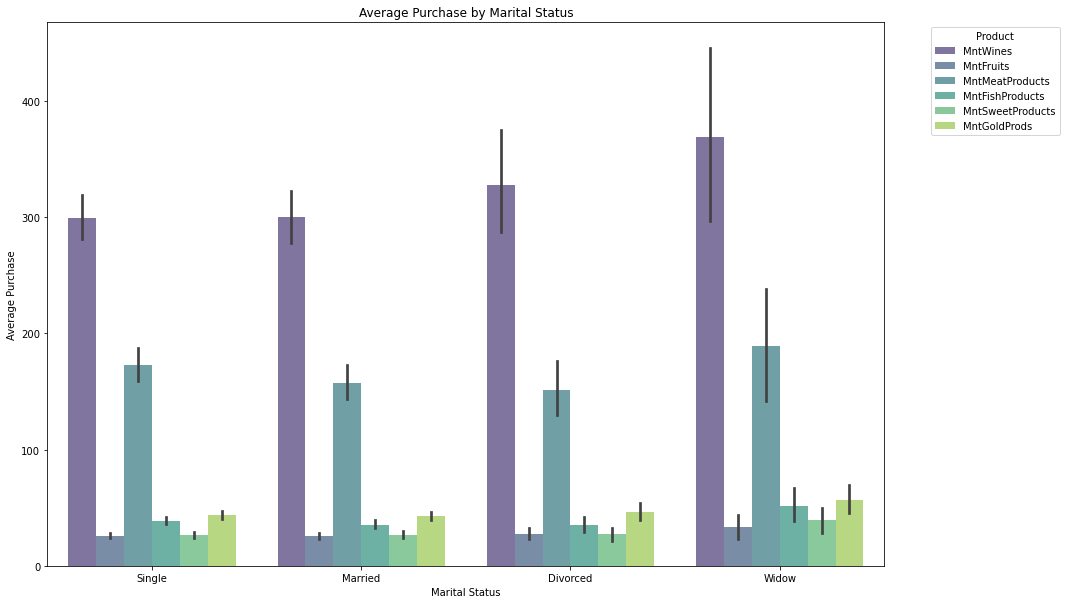

In [44]:
# Melt DataFrame untuk mempermudah visualisasi
df_melted = pd.melt(df, id_vars=['Marital_Status'], value_vars=products, var_name='Product', value_name='Total_Purchase')

# Plotting jumlah pembelian produk untuk setiap status pernikahan
plt.figure(figsize=(15, 10))
sns.barplot(x='Marital_Status', y='Total_Purchase', hue='Product', data=df_melted, palette='viridis', alpha=0.7)
plt.title('Average Purchase by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Seseorang yang memiliki status Widow memiliki rata-rata pembelian teringgi antar komoditas produk

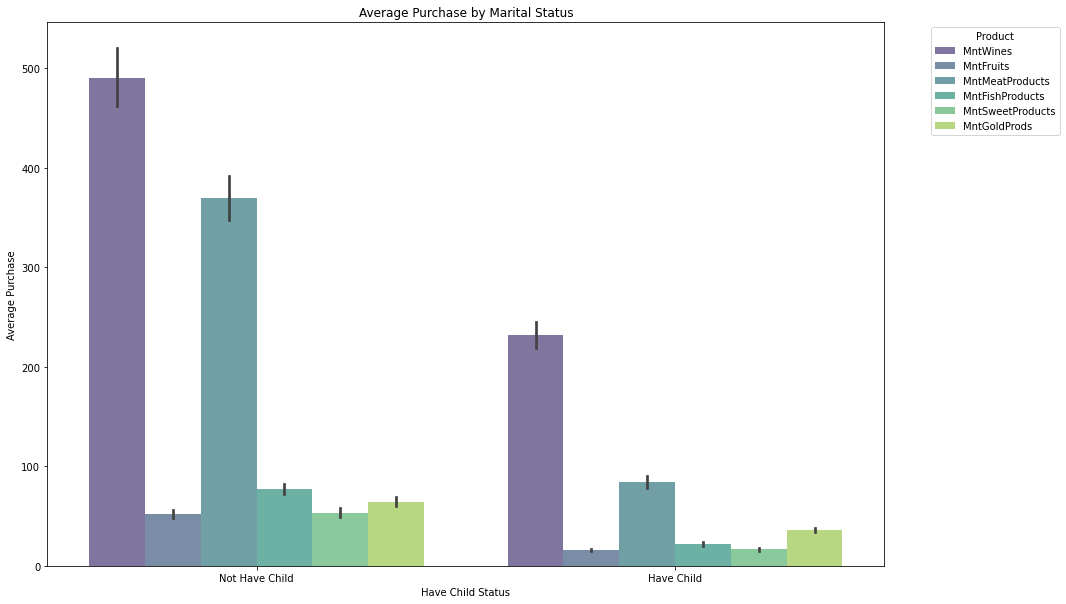

In [45]:
# Melt DataFrame untuk mempermudah visualisasi
df_melted = pd.melt(df, id_vars=['Child_Status'], value_vars=products, var_name='Product', value_name='Total_Purchase')

# Plotting jumlah pembelian produk untuk setiap status pernikahan
plt.figure(figsize=(15, 10))
sns.barplot(x='Child_Status', y='Total_Purchase', hue='Product', data=df_melted, palette='viridis', alpha=0.7)
plt.title('Average Purchase by Marital Status')
plt.xlabel('Have Child Status')
plt.ylabel('Average Purchase')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Seseorang yang memiliki status belum memiliki anak memiliki rata-rata pembelian teringgi antar komoditas produk

==========================================

**4. Apakah terdapat korelasi positif/negatif antara income dan juga penjualan komoditas satu dengan yang lain?**

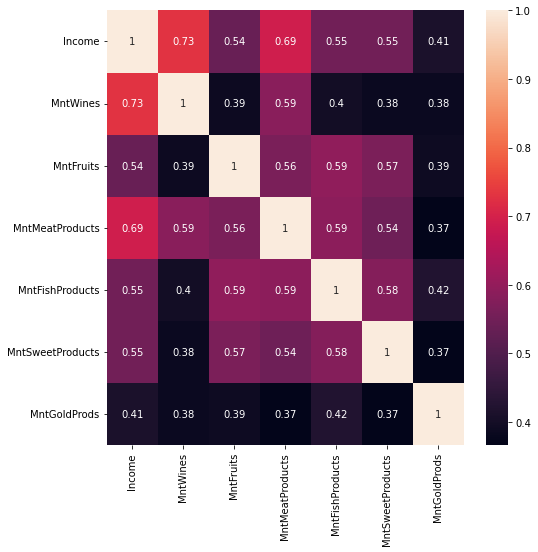

In [46]:
df_corr=df[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2g');

Perhatikan bahwa:

Seseorang yang memiliki income lebih suka membeli Wine dan Daging (Meat) (korelasi kuat >0.5)

Seseorang yang cenderung membeli salah satu dari Fruits, Meat, Fish, dan Sweet akan cenderung membeli yang lainnya dari keempat komoditas tersebut (korelasi kuat >0.5)

Seseorang yang membeli komoditas selain Gold korelasinya dengan membeli komoditas Gold cukup rendah (korelasi rendah <0.5)

==========================================

**5. Apakah ada korelasi antara total penghasilan pelanggan dengan jumlah pembelian dengan diskon?**

Sebelum melakukan uji korelasi, kita perlu ketahui kenormalan data, supaya kita bisa menggunakan alat uji yang tepat

In [47]:
#Melakukan uji normalitas dengan Kolmogorov-Smirnov
for i in ['Income', 'NumDealsPurchases']:
    stat, p_value = kstest(df[i], 'norm')

    # Menentukan tingkat signifikansi (contoh: 0.05)
    alpha = 0.05
    
    # Menyimpulkan hasil pengujian
    if p_value < alpha:
        print("Data {} tidak terdistribusi normal.".format(i))
    else:
        print("Data {} terdistribusi normal.".format(i))

Data Income tidak terdistribusi normal.
Data NumDealsPurchases tidak terdistribusi normal.


Karena data tidak normal maka akan digunakan metode spearman

In [48]:
korelasi_spearman1 = df[['Income', 'NumDealsPurchases']].corr(method='spearman')

# Menampilkan matriks korelasi Spearman
print("Matriks Korelasi Spearman:")
print(korelasi_spearman1)

Matriks Korelasi Spearman:
                     Income  NumDealsPurchases
Income             1.000000          -0.191939
NumDealsPurchases -0.191939           1.000000


Berdasarkan matriks korelasi, korelasi antara 'Income' dan 'NumDealsPurchases' hanya -0.19 yang dapat disimpulkan bahwa tidak ada korelasi yang signifikan antara besar total penghasilan dan pembelian dengan diskon

==========================================

**6. Kelompok umur mana yang cenderung melakukan pembelian melalui market place Web, Catalog atau Store?**

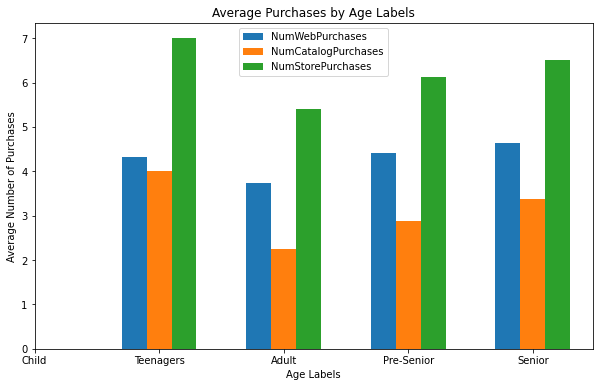

In [49]:
# Kelompokkan data berdasarkan kategori umur
df_mean = df.groupby('Age_Labels').mean()

# Visualisasi
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(df_mean.index))
plt.bar(index, df_mean['NumWebPurchases'], width=bar_width, label='NumWebPurchases')
plt.bar(index + bar_width, df_mean['NumCatalogPurchases'], width=bar_width, label='NumCatalogPurchases')
plt.bar(index + 2 * bar_width, df_mean['NumStorePurchases'], width=bar_width, label='NumStorePurchases')
plt.xlabel('Age Labels')
plt.ylabel('Average Number of Purchases')
plt.title('Average Purchases by Age Labels')
plt.xticks(index + bar_width, df_mean.index)
plt.legend()
plt.show()

Berdasarkan grafik diatas maka disimpulkan bahwa rata-rata penjualan di toko masih diatas dibanding catalog dan web untuk setiap kategori umur

==========================================

**7. Berapakah rata-rata penjualan masing-masing market place?**

In [50]:
for i in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    mean_purc= df[i].mean()
    print(f"Rata-rata pembelian via {i} : {mean_purc}")

Rata-rata pembelian via NumWebPurchases : 4.10004486316734
Rata-rata pembelian via NumCatalogPurchases : 2.636608344549125
Rata-rata pembelian via NumStorePurchases : 5.812471960520413


**8. Apakah rata-rata pembelian antar market place yaitu Web, Catalog dan Store sama?**

Kita akan menguji kenormalan data terlebih dahulu sehingga dapat digunakan alat uji hipotesis yang sesuai

In [51]:
#Melakukan uji normalitas dengan Kolmogorov-Smirnov
for i in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    stat, p_value = kstest(df[i], 'norm')

    # Menentukan tingkat signifikansi (contoh: 0.05)
    alpha = 0.05
    
    # Menyimpulkan hasil pengujian
    if p_value < alpha:
        print("Data {} tidak terdistribusi normal.".format(i))
    else:
        print("Data {} terdistribusi normal.".format(i))

Data NumWebPurchases tidak terdistribusi normal.
Data NumCatalogPurchases tidak terdistribusi normal.
Data NumStorePurchases tidak terdistribusi normal.


Akibat ketiga data tidak normal, maka kita akan gunakan Kruskal Wallis test

Hipotesis:

H0: Median pembelian via Web, Catalog dan Store

HA: Ada setidaknya 1 median pembelian via Web, Catalog atau Store yang berbeda secara signifikan

In [52]:
from scipy.stats import kruskal

f_stat, p_value = kruskal(df['NumWebPurchases'], df['NumCatalogPurchases'], df['NumStorePurchases'])

if p_value < 0.05:
    print('Terdapat bukti statistik yang cukup untuk menolak hipotesis nol.')
    print('Ada setidaknya 1 median pembelian via Web, Catalog atau Store yang berbeda secara signifikan')
else:
    print('Tidak terdapat bukti statistik yang cukup untuk menolak hipotesis nol.')

Terdapat bukti statistik yang cukup untuk menolak hipotesis nol.
Ada setidaknya 1 median pembelian via Web, Catalog atau Store yang berbeda secara signifikan


Jadi, terdapat perbedaan rata-rata pembelian produk antar market place  

==========================================

**9. Apakah ada korelasi antara pembelian dengan diskon dengan terakhir kali pelanggan melakukan pembelian?**

Kita akan menguji kenormalan data terlebih dahulu sehingga dapat digunakan alat uji korelasi spearman / pearson

In [53]:
#Melakukan uji normalitas dengan Kolmogorov-Smirnov
for i in ['NumDealsPurchases', 'Recency']:
    stat, p_value = kstest(df[i], 'norm')

    # Menentukan tingkat signifikansi (contoh: 0.05)
    alpha = 0.05
    
    # Menyimpulkan hasil pengujian
    if p_value < alpha:
        print("Data {} tidak terdistribusi normal.".format(i))
    else:
        print("Data {} terdistribusi normal.".format(i))

Data NumDealsPurchases tidak terdistribusi normal.
Data Recency tidak terdistribusi normal.


Karena data tidak normal maka akan digunakan metode spearman

In [54]:
korelasi_spearman2 = df[['NumDealsPurchases', 'Recency']].corr(method='spearman')

# Menampilkan matriks korelasi Spearman
print("Matriks Korelasi Spearman:")
print(korelasi_spearman2)

Matriks Korelasi Spearman:
                   NumDealsPurchases   Recency
NumDealsPurchases           1.000000  0.007872
Recency                     0.007872  1.000000


Berdasarkan matriks korelasi, korelasi antara 'NumDealsPurchases' dan 'Recency' hanya 0.007 yang dapat disimpulkan bahwa tidak ada korelasi yang signifikan antara pembelian dengan diskon dengan terakhir kali melakukan pembelian

==========================================

## Efektifitas Campaign

**1. Jumlah pelanggan yang sukses mengikuti campaign 1 s/d terakhir? Manakah yang tertinggi?**

In [55]:
# Menghitung jumlah pelanggan yang berhasil mengikuti setiap Campaign
Succ_campaign1 = df['AcceptedCmp1'].sum()
Succ_campaign2 = df['AcceptedCmp2'].sum()
Succ_campaign3 = df['AcceptedCmp3'].sum()
Succ_campaign4 = df['AcceptedCmp4'].sum()
Succ_campaign5 = df['AcceptedCmp5'].sum()
Succ_lastcampaign = df['Response'].sum()

# Menampilkan hasil
print("Jumlah pelanggan yang berhasil mengikuti Campaign 1:", Succ_campaign1)
print("Jumlah pelanggan yang berhasil mengikuti Campaign 2:", Succ_campaign2)
print("Jumlah pelanggan yang berhasil mengikuti Campaign 3:", Succ_campaign3)
print("Jumlah pelanggan yang berhasil mengikuti Campaign 4:", Succ_campaign4)
print("Jumlah pelanggan yang berhasil mengikuti Campaign 5:", Succ_campaign5)
print("Jumlah pelanggan yang berhasil mengikuti Campaign terakhir:", Succ_lastcampaign)

Jumlah pelanggan yang berhasil mengikuti Campaign 1: 144
Jumlah pelanggan yang berhasil mengikuti Campaign 2: 30
Jumlah pelanggan yang berhasil mengikuti Campaign 3: 163
Jumlah pelanggan yang berhasil mengikuti Campaign 4: 167
Jumlah pelanggan yang berhasil mengikuti Campaign 5: 162
Jumlah pelanggan yang berhasil mengikuti Campaign terakhir: 334


Perhatikan bahwa jumlah pelanggan yang mengikuti campaign terakhir cenderung lebih tinggi daripada sebelumnya, kita akan lanjutkan dengan uji proporsi.

==========================================

**2. Bagaimana efektivitas campaign terakhir dibandingkan dengan campaign sebelumnya?**

Kita akan menguji proporsi dalam melihat efektifitas campaign terakhir ini

Hipotesis:

H0: prop last campaign dan prop old campaign (campaign 1-5) adalah sama

HA: prop last campaign > prop old campaign (campaign 1-5)

In [56]:
from statsmodels.stats.proportion import proportions_ztest
for i in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    Old_acc = np.where(df[i] == 1, 'Buying', 'No_Buying')
    Last_acc = np.where(df['Response'] == 1, 'Buying', 'No_Buying')
    
    df_full = pd.DataFrame(columns=['Campaign', 'Conversion'])
    
    # Menambahkan data kampanye lama ke df_full
    df_old = pd.DataFrame({'Campaign': 'Old_Campaign', 'Conversion': Old_acc})
    df_full = df_full.append(df_old, ignore_index=True)
    
    # Menambahkan data kampanye terakhir ke df_full
    df_last = pd.DataFrame({'Campaign': 'Last_Campaign', 'Conversion': Last_acc})
    df_full = df_full.append(df_last, ignore_index=True)
    
    #Conversion rate old campaign
    n_success_old=len(df_full[(df_full['Campaign']=='Old_Campaign') & (df_full['Conversion']=='Buying')])
    n_old=len(df_full[(df_full['Campaign']=='Old_Campaign')])
    
    #Conversion rate last campaign
    n_success_last=len(df_full[(df_full['Campaign']=='Last_Campaign') & (df_full['Conversion']=='Buying')])
    n_last=len(df_full[(df_full['Campaign']=='Last_Campaign')])
    
    #total number buying transaction success
    number_success=np.array([n_success_old,n_success_last])
    
    #total trafic (all visitor (buy/not))
    total_trafic=np.array([n_old,n_last])
    
    #Uji Hipotesis 2 Proporsi
    z_stat,p_value=proportions_ztest(number_success,total_trafic,alternative='smaller')
    
    print('P Value:',p_value)
    if p_value<=0.05/2:
        print('Tolak H0, Jadi prop last campaign > prop old campaign ({})'.format(i))
    else:
        print('Terima H0, Jadi prop last campaign > prop old campaign ({})'.format(i))
    print('=======================================================')

P Value: 1.8324658840890775e-20
Tolak H0, Jadi prop last campaign > prop old campaign (AcceptedCmp1)
P Value: 2.2142119458033553e-62
Tolak H0, Jadi prop last campaign > prop old campaign (AcceptedCmp2)
P Value: 2.0193265872606002e-16
Tolak H0, Jadi prop last campaign > prop old campaign (AcceptedCmp3)
P Value: 1.1946389768546021e-15
Tolak H0, Jadi prop last campaign > prop old campaign (AcceptedCmp4)
P Value: 1.2824981498138401e-16
Tolak H0, Jadi prop last campaign > prop old campaign (AcceptedCmp5)


Perhatikan bahwa dari uji hipotesis disimpulkan bahwa campaign terakhir (Response) jauh lebih berhasil dibandingkan campaign sebelumnya.

==========================================

**3. Jumlah Customer yang sukses mengikuti campaign terakhir setiap kelompok umur?**

In [57]:
# Menghitung jumlah pelanggan yang berhasil mengikuti campaign terakhir (Response) berdasarkan kelompok umur
totallast_bygroup= df.groupby('Age_Labels')['Response'].sum()

# Menghitung persentase pelanggan yang berhasil mengikuti campaign terakhir (Response) berdasarkan kelompok umur
perclast_bygroup = df.groupby('Age_Labels')['Response'].mean() * 100

# Menampilkan hasil
print("Jumlah pelanggan yang berhasil mengikuti Campaign terakhir berdasarkan kelompok umur:")
print(totallast_bygroup)
print('\n')
print("Persentase pelanggan yang berhasil mengikuti Campaign terakhir berdasarkan kelompok umur:")
print(perclast_bygroup)

Jumlah pelanggan yang berhasil mengikuti Campaign terakhir berdasarkan kelompok umur:
Age_Labels
Child           0
Teenagers       3
Adult         185
Pre-Senior     99
Senior         47
Name: Response, dtype: int64


Persentase pelanggan yang berhasil mengikuti Campaign terakhir berdasarkan kelompok umur:
Age_Labels
Child               NaN
Teenagers     50.000000
Adult         16.129032
Pre-Senior    12.992126
Senior        14.968153
Name: Response, dtype: float64


Perhatikan bahwa, 'Teenagers' memiliki proporsi penerimaan campaign terakhir yang tertinggi, namun perlu diingat hanya 3 dari total 6 pelanggan yang tercatat dalam kategori ini. Selanjutnya, kecuali pada kelompok umur 'Teenagers', proporsi penerimaan campaign terakhir cenderung sama, kita akan uji untuk melihatnya

==========================================

**4. Apakah terdapat perbedaan proporsi kesuksesan campaign untuk masing-masing kategori umur pelanggan ('Adult', 'Pre-Senior', 'Senior')?**

Hipotesis:

H0: Tidak terdapat perbedaan antar proporsi keberhasilan kampanye terakhir masing masing kategori umur ('Adult', 'Pre-Senior', 'Senior'). 

HA: Terdapat perbedaan signifikan dalam proporsi keberhasilan kampanye terakhir masing masing kategori umur ('Adult', 'Pre-Senior', 'Senior').

In [58]:
from scipy.stats import chi2_contingency


# Filter DataFrame untuk hanya mempertimbangkan 'Adult', 'Pre-Senior', dan 'Senior'
filtered_df = df[df['Age_Labels'].isin(['Adult', 'Pre-Senior', 'Senior'])]

# Membuat tabel kontingensi (cross tab) untuk uji chi-square
contingency_table = pd.crosstab(filtered_df['Age_Labels'], filtered_df['Response'])

# Melakukan uji chi-square
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Nilai Chi-square: {chi2_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('Terdapat bukti statistik yang cukup untuk menolak hipotesis nol.')
    print('Terdapat perbedaan signifikan dalam proporsi keberhasilan kampanye terakhir masing masing kategori umur.')
else:
    print('Tidak terdapat bukti statistik yang cukup untuk menolak hipotesis nol.')

Nilai Chi-square: 3.556818853974934
P-value: 0.16890659198839247
Tidak terdapat bukti statistik yang cukup untuk menolak hipotesis nol.


Jadi H0 diterima yaitu: Tidak terdapat perbedaan antar proporsi keberhasilan kampanye terakhir masing masing kategori umur ('Adult', 'Pre-Senior', 'Senior'). 

==========================================

## Efektifitas Website: 

**1. Berapakah rata-rata seseorang berkunjung ke website (perbulan)?**

In [59]:
mean_web_visits = df['NumWebVisitsMonth'].mean()
print(f"Rata-rata kunjungan website per bulan: {mean_web_visits}")

Rata-rata kunjungan website per bulan: 5.334230596680126


**2. Berapakah rata-rata penjualan via website?**

In [60]:
mean_web_purc = df['NumWebPurchases'].mean()
print(f"Rata-rata penjualan via web: {mean_web_purc}")

Rata-rata penjualan via web: 4.10004486316734


**3. Apakah ada korelasi antara frekuensi kunjungan situs web atau toko oleh pelanggan dengan jumlah pembelian produk via web?**

Kita akan menguji kenormalan data terlebih dahulu sehingga dapat digunakan alat uji korelasi spearman / pearson

In [61]:
#Melakukan uji normalitas dengan Kolmogorov-Smirnov
for i in ['NumWebPurchases', 'NumWebVisitsMonth']:
    stat, p_value = kstest(df[i], 'norm')

    # Menentukan tingkat signifikansi (contoh: 0.05)
    alpha = 0.05
    
    # Menyimpulkan hasil pengujian
    if p_value < alpha:
        print("Data {} tidak terdistribusi normal.".format(i))
    else:
        print("Data {} terdistribusi normal.".format(i))

Data NumWebPurchases tidak terdistribusi normal.
Data NumWebVisitsMonth tidak terdistribusi normal.


Karena data tidak normal maka akan digunakan metode spearman

In [62]:
korelasi_spearman3 = df[['NumWebPurchases', 'NumWebVisitsMonth']].corr(method='spearman')

# Menampilkan matriks korelasi Spearman
print("Matriks Korelasi Spearman:")
print(korelasi_spearman3)

Matriks Korelasi Spearman:
                   NumWebPurchases  NumWebVisitsMonth
NumWebPurchases           1.000000          -0.107348
NumWebVisitsMonth        -0.107348           1.000000


Berdasarkan matriks korelasi, korelasi antara 'NumWebPurchases' dan 'NumWebVisitsMonth' hanya -0.107 yang dapat disimpulkan bahwa tidak ada korelasi yang signifikan antara pembelian dan jumlah kunjungan di web

==========================================

**4. Berapakah rata-rata kunjungan website setiap kategori umur**

In [63]:
# Menghitung rata-rata kunjungan setiap kelompok umur
web_visits_byage = df.groupby('Age_Labels')['NumWebVisitsMonth'].mean()

web_visits_byage

Age_Labels
Child              NaN
Teenagers     4.500000
Adult         5.648649
Pre-Senior    5.145669
Senior        4.659236
Name: NumWebVisitsMonth, dtype: float64

Perhatikan bahwa rata-rata kunjungan website antar kategori umur tidak jauh berbeda yaitu di sekitar 5


==========================================

**5. Berapakah rata-rata dari total pembelian via website setiap kategori umur?**

In [64]:
# Menghitung rata-rata pembelian via website setiap kelompok umur
web_purchases_byage = df.groupby('Age_Labels')['NumWebPurchases'].mean()

web_purchases_byage

Age_Labels
Child              NaN
Teenagers     4.333333
Adult         3.741064
Pre-Senior    4.417323
Senior        4.636943
Name: NumWebPurchases, dtype: float64

Perhatikan bahwa rata-rata dari total pembelian via website antar kategori umur tidak jauh berbeda yaitu di sekitar 4

==========================================

## Komplain Pelanggan: 

**1. Berapakah jumlah dan persentase pelanggan yang melakukan komplain?**

In [65]:
komplain = df[df['Complain'] == 1].shape[0]
komplain

20

In [66]:
perc_komplain=komplain/total*100
perc_komplain

0.8972633467922835

Perhatikan bahwa hanya ada 20 pelanggan yang melakukan komplain, dengan persentase tidak mencapai 1% dari keseluruhan

==========================================

**2. Kelompok mana yang cenderung melakukan komplain terkait pembelian?**

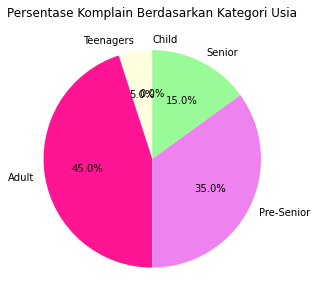

In [67]:
#Melihat kategori usia yang paling sering complain
complain_counts = df.groupby('Age_Labels')['Complain'].sum()

plt.figure(figsize=(5, 5))
plt.pie(complain_counts, 
        labels=complain_counts.index, 
        autopct='%1.1f%%', startangle=90, 
        colors=['palegreen','lightyellow','deeppink', 'violet'])
plt.title('Persentase Komplain Berdasarkan Kategori Usia')
plt.show()

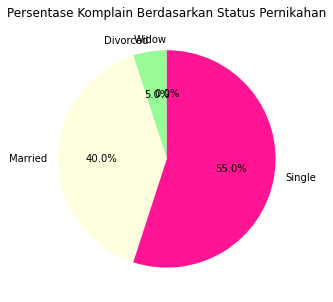

In [68]:
#Melihat status pernikahan yang paling sering complain
complain_counts = df.groupby('Marital_Status')['Complain'].sum()

plt.figure(figsize=(5, 5))
plt.pie(complain_counts, 
        labels=complain_counts.index, 
        autopct='%1.1f%%', startangle=90, 
        colors=['palegreen','lightyellow','deeppink', 'violet'])
plt.title('Persentase Komplain Berdasarkan Status Pernikahan')
plt.show()

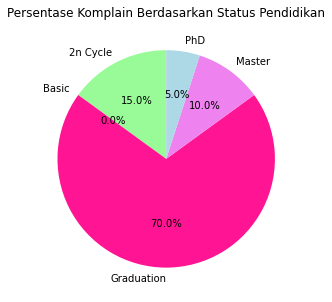

In [69]:
#Melihat status pendidikan yang paling sering complain
complain_counts = df.groupby('Education')['Complain'].sum()

plt.figure(figsize=(5, 5))
plt.pie(complain_counts, 
        labels=complain_counts.index, 
        autopct='%1.1f%%', startangle=90, 
        colors=['palegreen','lightyellow','deeppink', 'violet', 'lightblue'])
plt.title('Persentase Komplain Berdasarkan Status Pendidikan')
plt.show()

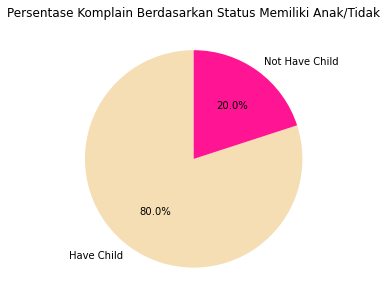

In [70]:
#Melihat status memiliki anak / tidak yang paling sering complain
complain_counts = df.groupby('Child_Status')['Complain'].sum()

plt.figure(figsize=(5, 5))
plt.pie(complain_counts, 
        labels=complain_counts.index, 
        autopct='%1.1f%%', startangle=90, 
        colors=['wheat','deeppink'])
plt.title('Persentase Komplain Berdasarkan Status Memiliki Anak/Tidak')
plt.show()

Perhatikan bahwa:

1. Kategori usia yang semakin lanjut akan cenderung melakukan komplain lebih banyak dibanginkan kategori usia yang lebih muda
2. Kategori status pernikahan yang cenderung melakukan komplain adalah yang berstatus single
3. Kategori status pendidikan yang cenderung melakukan komplain adalah yang berstatus graduation
4. Kategori status memiliki anak / tidak yang cenderung melakukan komplain adalah yang memiliki anak

==========================================

**3. Berapakah total pembelian setiap komoditas untuk konsumen yang melakukan komplain?**

In [71]:
# Filter data untuk pelanggan yang melakukan komplain
complain_customers = df[df['Complain'] == 1]

purchase_bycomplain = complain_customers.groupby('Complain')[["MntWines", "MntFruits", 
                                                              "MntMeatProducts", "MntFishProducts", 
                                                              "MntSweetProducts", "MntGoldProds"]].sum()

purchase_bycomplain

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Complain,,,,,,
1,3534,502,2354,534,364,552


Tabel diatas menunjukan kemungkinan kehilangan pemasukan akibat tidak menangani komplain dengan benar


==========================================

**4. Berapakah total pembelian setiap komoditas di semua kelompok umur yang melakukan komplain?**

In [72]:
# Groupby berdasarkan kelompok umur dan menghitung total pembelian setiap komoditas
purchase_complain = complain_customers.groupby('Age_Labels')[["MntWines", "MntFruits", "MntMeatProducts", 
                                                              "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum()

purchase_complain

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_Labels,,,,,,
Child,0,0,0,0,0,0
Teenagers,536,27,590,38,107,67
Adult,699,69,607,35,35,267
Pre-Senior,1280,375,895,386,213,189
Senior,1019,31,262,75,9,29


Tabel diatas menunjukan kemungkinan kehilangan pemasukan setiap kategori umur akibat tidak menangani komplain dengan benar


==========================================

# Kesimpulan dan Saran

## Kesimpulan:

**Segmentasi Pelanggan:**

1. Total pelanggan tercatat: 2229.
2. Pelanggan terbanyak berada dalam kelompok umur "Adult", status pernikahan "Single", status pendidikan "Graduation", dan memiliki anak.
3. Pelanggan rendah berada dalam kelompok umur "Child" dan "Teenagers", status pernikahan "Widow", status pendidikan "Basic", dan tidak memiliki anak.
4. Distribusi umur pelanggan tidak berdistribusi normal.

**Performa Penjualan:**

1. 38,5% dari pelanggan tergolong pasif (lebih dari 2 bulan dari terakhir pembelian).
2. Rata-rata penjualan tertinggi untuk Wines, Meat, dan Gold (khusus untuk wines, rata-ratanya tertinggi dan hampir 2x lipat dibanding meat yang menempati urutan kedua). Pelanggan terbanyak melakukan pembelian pada kategori Wines, Meat, dan Gold.
3. Preferensi pembelian berbeda-beda untuk setiap kelompok pelanggan.
4. Teenagers adalah customer yang memiliki rata-rata pembelian tertinggi dari hampir seluruh komoditas selain Wines dan Gold (Emas) walaupun hanya 0.2% dari keseluruhan pelanggan.
5. Korelasi kuat dan positif antara pendapatan dan pembelian Wine serta Meat. Korelasi kuat dan positif antara pembelian Fruits, Meat, Fish, dan Sweet. Korelasi rendah antara pembelian komoditas selain Gold dengan Gold.
6. Tidak ada korelasi yang signifikan antara total penghasilan dan pembelian dengan diskon.

**Efektivitas Campaign:**

1. Jumlah pelanggan yang berhasil mengikuti campaign terakhir (334) lebih tinggi dibandingkan campaign sebelumnya.
2. Campaign terakhir jauh lebih berhasil dibandingkan dengan campaign sebelumnya.
3. Proporsi penerimaan campaign terakhir cukup seragam untuk kelompok umur kecuali pada kelompok 'Child' dan 'Teenagers'. Akan tetapi proporsi penerimaan campaign terakhir pada 'Teenagers' memiliki tingkat keberhasilan 50% dari total pelanggan 'Teenagers'.
4. Tidak terdapat perbedaan signifikan antara proporsi keberhasilan kampanye terakhir untuk kelompok umur 'Adult', 'Pre-Senior', dan 'Senior'.

**Efektivitas Website:**

1. Rata-rata pelanggan mengunjungi website sekitar 5 kali per bulan.
2. Rata-rata penjualan melalui website sekitar 4.1.
3. Rata-rata kunjungan website antar kategori umur tidak jauh berbeda yaitu di sekitar 5
4. Rata-rata dari total pembelian via website antar kategori umur tidak jauh berbeda yaitu di sekitar 4

**Komplain Pelanggan:**

1. Hanya 20 pelanggan (kurang dari 1%) yang melakukan komplain.
2. Kelompok usia yang lebih tua, status pernikahan single, status pendidikan graduation, dan status memiliki anak cenderung melakukan komplain.
3. Walaupun pelanggan yang melakukan komplain memiliki persentase yang kecil namun berpotensi menghilangkan pendapatan jika komplain tidak ditangani dengan benar.

## Saran:

**Segmentasi Pelanggan:**
1. Fokus pada kelompok pelanggan terbanyak, yaitu yang berada dalam kelompok umur "Adult", status pernikahan "Single", status pendidikan "Graduation", dan memiliki anak.
2. Rancang strategi untuk meningkatkan kelompok pelanggan terendah, yaitu yang berada dalam kelompok umur "Child" dan "Teenagers", status pernikahan "Widow", status pendidikan "Basic", dan tidak memiliki anak.

**Performa Penjualan:**
1. Tingkatkan persediaan dan promosi untuk produk dengan rata-rata penjualan tertinggi, seperti Wines, Meat, dan Gold.
2. Merancang paket penawaran atau bundel produk yang menarik untuk meningkatkan penjualan lintas kategori seperti bundle Fruits, Meat, Fish, dan Sweet
3. Implementasikan program diskon atau poin loyalitas khusus untuk produk Fruits, Fish, dan Sweet

**Efektivitas Campaign:**
1. Lanjutkan campaign yang telah berhasil, terutama yang paling terkini.
2. Pertimbangkan untuk menyesuaikan jenis campaign atau penawaran berdasarkan preferensi dan perilaku belanja pelanggan.
3. Rancang campaign yang menyasar kepada kelompok pelanggan terendah, yaitu yang berada dalam kelompok umur "Child" dan "Teenagers", status pernikahan "Widow", status pendidikan "Basic", dan tidak memiliki anak.
4. Rancang campaign yang menyasar kepada kelompok pelanggan yang tergolong pasif.

**Efektivitas Website:**
1. Perkuat kehadiran online dengan memastikan situs web responsif, mudah dinavigasi, dan menawarkan pengalaman berbelanja yang menyenangkan.
2. Gunakan data kunjungan situs web dan pembelian online untuk merancang promosi atau rekomendasi produk yang sesuai.
3. Pertimbangkan untuk melibatkan pelanggan secara aktif melalui platform online, seperti survei kepuasan pelanggan atau ulasan produk.

**Komplain Pelanggan:**
1. Identifikasi dan tangani permasalahan yang cenderung menyebabkan keluhan pada kelompok pelanggan yang lebih tua, single, dan berpendidikan graduation.
2. Bangun hubungan komunikasi terbuka dengan pelanggan melalui saluran yang sesuai untuk memahami dan menyelesaikan keluhan dengan efektif.
